### Voronyi-Stepan-Camp-2025
### Data cleaning

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Car_Insurance_Claim.csv")

cols_to_drop = ['Unnamed: 0', 'ID']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

num_col_indices = [6, 7, 9, 10, 11, 12, 14, 15, 16, 17]
num_cols = df.columns[num_col_indices]
df[num_cols] = df[num_cols].apply(lambda col: pd.to_numeric(col, errors='coerce'))

df = df.apply(lambda x: np.nan if isinstance(x, str) and x.strip().lower() == 'none' else x)
df['EDUCATION'] = df['EDUCATION'].fillna('unknown')

columns_to_keep_na = ['ANNUAL_MILEAGE', 'CREDIT_SCORE']
df = df.dropna(subset=[col for col in df.columns if col not in columns_to_keep_na])
bool_cols = ['OUTCOME', 'CHILDREN', 'MARRIED', 'VEHICLE_OWNERSHIP']
df[bool_cols] = df[bool_cols].astype(bool)
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(
    df.groupby(['VEHICLE_YEAR', 'VEHICLE_TYPE'])['ANNUAL_MILEAGE']
    .transform(lambda x: np.round(x.mean(), -3))
)
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(
    df.groupby(['AGE', 'GENDER', 'INCOME'])['CREDIT_SCORE'].transform('mean')
)
int_cols = ['POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
df[int_cols] = df[int_cols].astype(int)

pd.set_option('display.max_columns', None)
df


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000,sedan,2,0,1,True
5,40-64,female,majority,20-29y,high school,upper class,0.619127,True,after 2015,False,True,10238,13000,sedan,3,0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000,sedan,0,0,1,False
9996,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,11000,sedan,1,0,0,False
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000,sedan,0,0,0,False
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000,sedan,2,0,1,True


### Descriptive Statistic and Data Visualization

In [9]:
print(df.describe(), end='')

       CREDIT_SCORE   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count   8701.000000   8701.000000     8701.000000          8701.000000   
mean       0.514959  19724.934720    11707.045167             1.471785   
std        0.135030  18706.869493     2674.620139             2.242339   
min        0.053358  10238.000000     2000.000000             0.000000   
25%        0.417066  10238.000000    10000.000000             0.000000   
50%        0.525230  10238.000000    12000.000000             0.000000   
75%        0.617001  32765.000000    13000.000000             2.000000   
max        0.960819  92101.000000    22000.000000            22.000000   

              DUIS  PAST_ACCIDENTS  
count  8701.000000     8701.000000  
mean      0.237329        1.050684  
std       0.556974        1.648080  
min       0.000000        0.000000  
25%       0.000000        0.000000  
50%       0.000000        0.000000  
75%       0.000000        2.000000  
max       6.000000       15.000000  

In [ ]:
print("Descriptive Statistics for all columns:\n")
print(df.describe(include='all'), '\n')

print("Detailed Value Counts for each column:\n")
for column in df.columns:
    print(f"--- Value counts for column: {column} ---")

    unique_values_count = df[column].nunique()
    print(f"Unique values count: {unique_values_count}")
 
    value_counts = df[column].value_counts(dropna=False)
    print(f"Value counts (including NaN):\n{value_counts}\n")

    missing_values_percentage = df[column].isna().mean() * 100
    print(f"Missing values percentage: {missing_values_percentage:.2f}%\n")


Descriptive Statistics for all columns:

          AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION       INCOME  \
count    8701    8701      8701               8701         8701         8701   
unique      4       2         2                  4            3            4   
top     26-39  female  majority               0-9y  high school  upper class   
freq     2684    4369      7860               3088         3579         3748   
mean      NaN     NaN       NaN                NaN          NaN          NaN   
std       NaN     NaN       NaN                NaN          NaN          NaN   
min       NaN     NaN       NaN                NaN          NaN          NaN   
25%       NaN     NaN       NaN                NaN          NaN          NaN   
50%       NaN     NaN       NaN                NaN          NaN          NaN   
75%       NaN     NaN       NaN                NaN          NaN          NaN   
max       NaN     NaN       NaN                NaN          NaN          NaN   

### Data Visualization

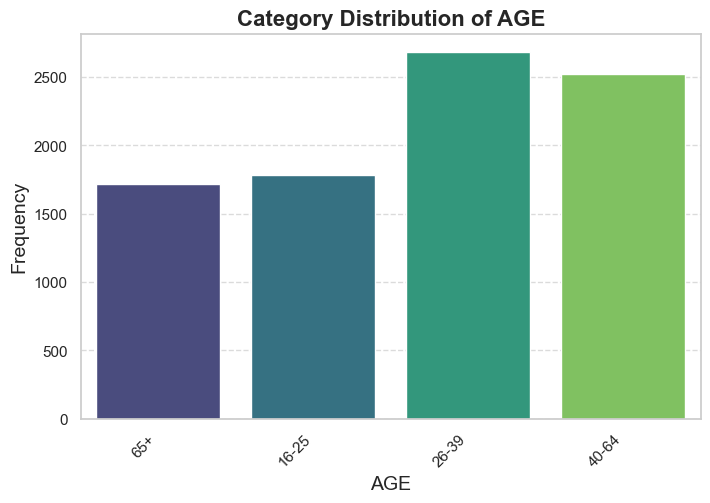

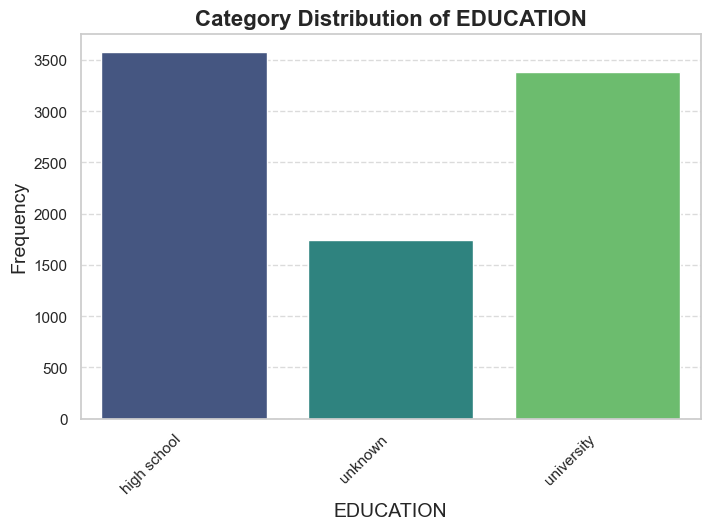

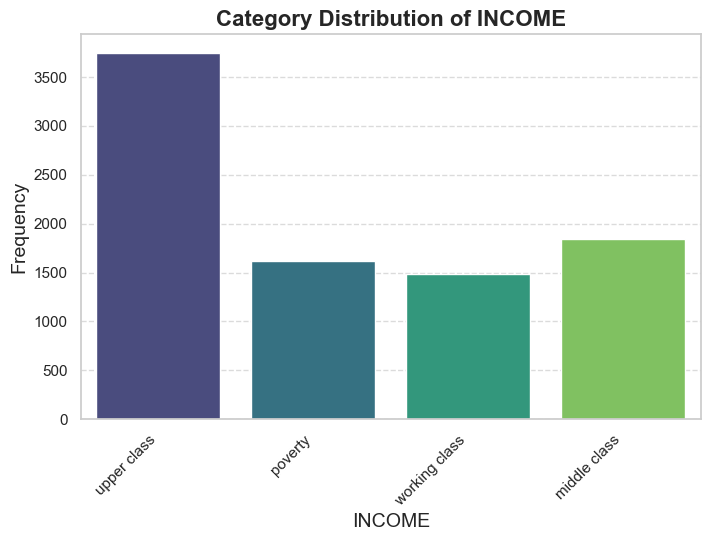

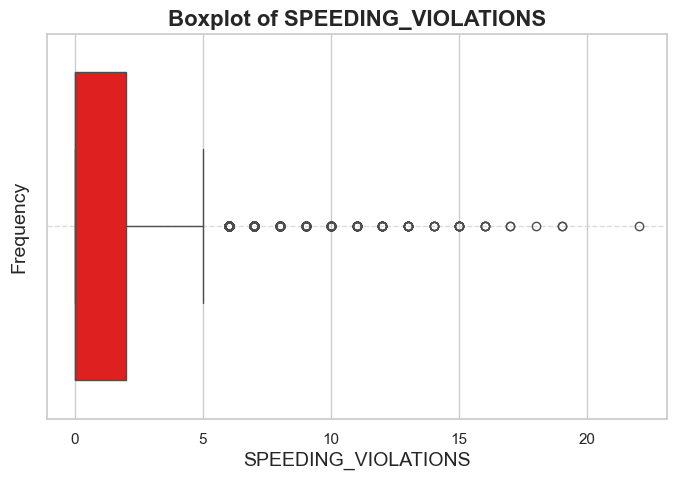

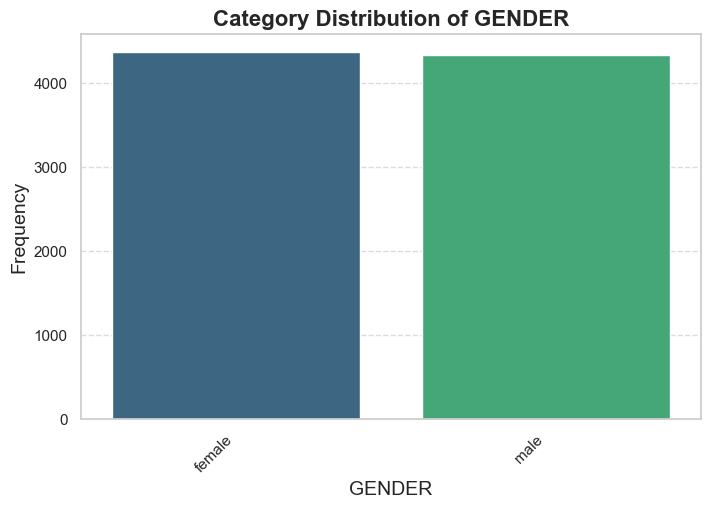

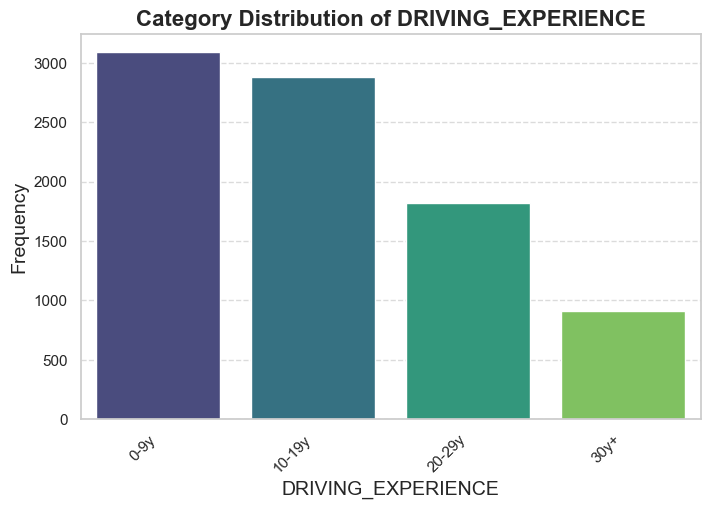

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_variable(df, column, bins=20, color="skyblue"):
    plt.figure(figsize=(8, 5))
    df = df.dropna(subset=[column])

    if df[column].dtype == "object" or df[column].nunique() < 10:
        sns.countplot(x=df[column], palette="viridis", hue=df[column])
        plt.xticks(rotation=45, ha="right")
        plt.title(f"Category Distribution of {column}", fontsize=16, fontweight="bold")

    else:
        if df[column].nunique() < 50:
            sns.boxplot(x=df[column], color=color)
            plt.title(f"Boxplot of {column}", fontsize=16, fontweight="bold")
        else:
            sns.histplot(df[column], bins=bins, kde=True, color=color, edgecolor="black")
            plt.title(f"Distribution of {column} (with KDE)", fontsize=16, fontweight="bold")
    
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

plot_variable(df, "AGE", color="orange")         
plot_variable(df, "EDUCATION", color="skyblue")   
plot_variable(df, "INCOME", color="green")         
plot_variable(df, "SPEEDING_VIOLATIONS", color="red") 
plot_variable(df, "GENDER", color="purple")       
plot_variable(df, "DRIVING_EXPERIENCE", color="brown") 


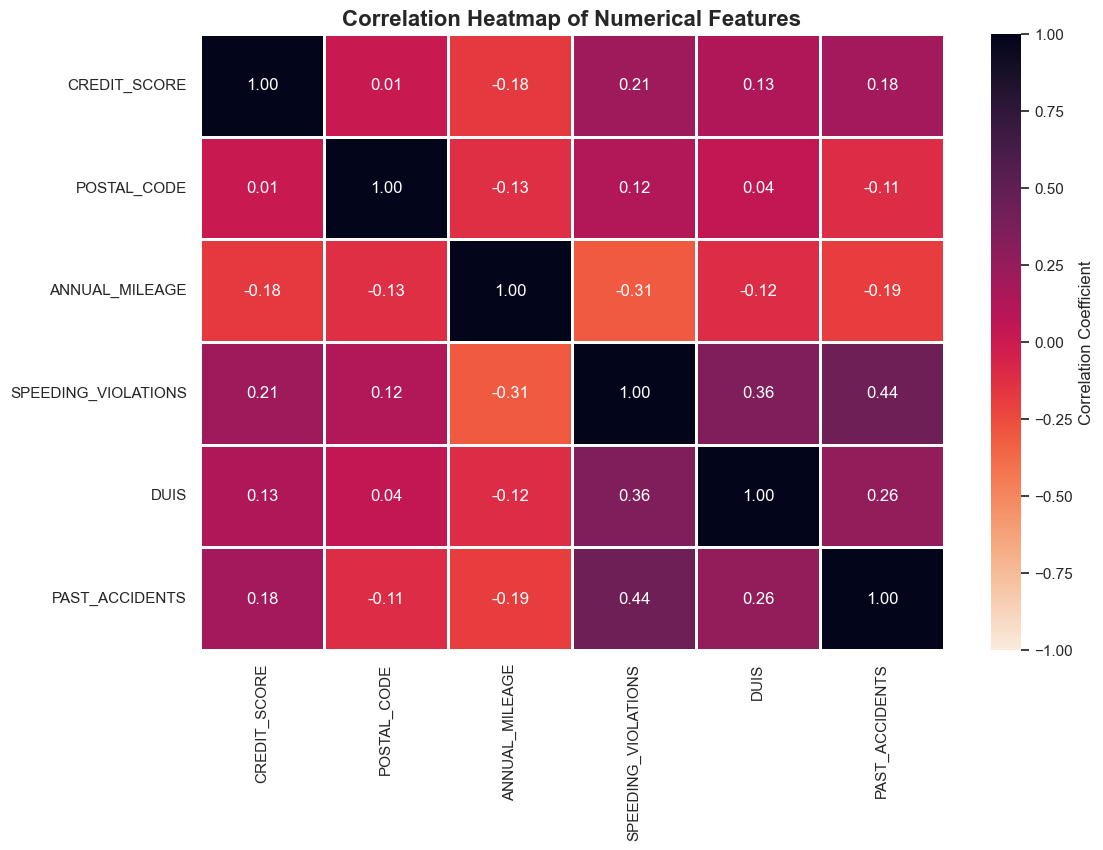

In [ ]:
def plot_heatmap_of_correlations(df):
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(12, 8))

    sns.heatmap(
        corr, 
        annot=True,  
        cmap='rocket_r',  
        fmt='.2f',  
        linewidths=1,  
        ax=ax,  
        cbar_kws={'label': 'Correlation Coefficient'}, 
        vmin=-1, vmax=1
    )
    
    ax.set_title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight="bold")
    plt.show()

plot_heatmap_of_correlations(df)


### Conclusions

In the Exploratory Data Analysis (EDA) of the car insurance dataset, several important steps were undertaken to gain insights and draw conclusions:

Data Cleaning: The dataset was meticulously cleaned to address missing values, incorrect data types, and outliers that could skew the analysis. Inconsistent or duplicate entries were also removed to ensure data accuracy and prepare it for further examination.

Descriptive Statistics: Basic statistical measures such as mean, median, mode, and standard deviation were computed for numerical features like age, claim amount, and policy type.

Data Visualization: A variety of visualization methods, including histograms, box plots, and scatter plots, were employed to examine the relationships between features like age, occupation, and the likelihood of making a claim. These visualizations uncovered patterns, such as certain age groups being more or less likely to file claims, and specific occupations being associated with higher risk.

Conclusions: The EDA revealed that age and occupation significantly influenced the likelihood of filing a claim. Younger individuals and those in higher-risk occupations were more likely to make claims. This insight enables the insurance company to refine its policies by offering targeted insurance plans to specific age groups or professions. Moreover, customers with a clean driving history or longer tenure with the company had a lower probability of making a claim, suggesting that loyalty and past behavior should be considered when developing future policies.